In [1]:
# ✅ Instalar dependencias necesarias (si no usas conda)
!pip install numpy matplotlib

In [21]:
import sys
from pathlib import Path

# ✅ Ir un solo nivel hacia arriba (de notebook/ a la raíz del proyecto)
project_root = Path().resolve().parent
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))



In [22]:
# ✅ Importar funciones del proyecto
from src.optimizadores import gradient_descent, stochastic_gradient_descent
from src.visualizador import visualizar_resultados
from src.utils import generar_datos_sinteticos
from src.modelo_analitico import calculo_cerrado_regresion

In [24]:
# ✅ Flujo principal
print("Comparación de Gradient Descent (GD) y Stochastic Gradient Descent (SGD)")
X, y = generar_datos_sinteticos(n=100, seed=42)

# Cálculo cerrado
try:
    w_cerrado, b_cerrado = calculo_cerrado_regresion(X, y)
    print(f"✅ Parámetros analíticos: w = {w_cerrado:.4f}, b = {b_cerrado:.4f}")
except Exception as e:
    print(f"⚠️ No se pudo calcular la solución cerrada: {e}")

# Gradient Descent
print("Entrenando con GD...")
w_gd, b_gd, costs_gd, ws_gd, bs_gd = gradient_descent(X, y, lr=0.01)

# Stochastic Gradient Descent
print("Entrenando con SGD...")
w_sgd, b_sgd, costs_sgd, ws_sgd, bs_sgd = stochastic_gradient_descent(X, y, lr=0.001)

# Visualización
visualizar_resultados(costs_gd, costs_sgd, ws_gd, bs_gd, ws_sgd, bs_sgd)

print("\nParámetros finales con GD:", f"w = {w_gd:.4f}, b = {b_gd:.4f}")
print("Parámetros finales con SGD:", f"w = {w_sgd:.4f}, b = {b_sgd:.4f}")

Comparación de Gradient Descent (GD) y Stochastic Gradient Descent (SGD)
✅ Parámetros analíticos: w = 2.9540, b = 4.2151
Entrenando con GD...
GD Iteración 0: Costo = 58.8713, w = 2.2201, b = 0.3621
GD Iteración 10: Costo = 4.1978, w = 3.4852, b = 0.7589
GD Iteración 20: Costo = 3.8407, w = 3.4565, b = 0.9459
GD Iteración 30: Costo = 3.5213, w = 3.4293, b = 1.1228
GD Iteración 40: Costo = 3.2355, w = 3.4036, b = 1.2901
GD Iteración 50: Costo = 2.9798, w = 3.3793, b = 1.4483
GD Iteración 60: Costo = 2.7510, w = 3.3563, b = 1.5980
GD Iteración 70: Costo = 2.5463, w = 3.3345, b = 1.7396
GD Iteración 80: Costo = 2.3631, w = 3.3139, b = 1.8735
GD Iteración 90: Costo = 2.1992, w = 3.2944, b = 2.0002
GD Iteración 100: Costo = 2.0526, w = 3.2760, b = 2.1201
GD Iteración 110: Costo = 1.9214, w = 3.2586, b = 2.2334
GD Iteración 120: Costo = 1.8041, w = 3.2421, b = 2.3406
GD Iteración 130: Costo = 1.6991, w = 3.2265, b = 2.4420
GD Iteración 140: Costo = 1.6051, w = 3.2118, b = 2.5380
GD Iteración 

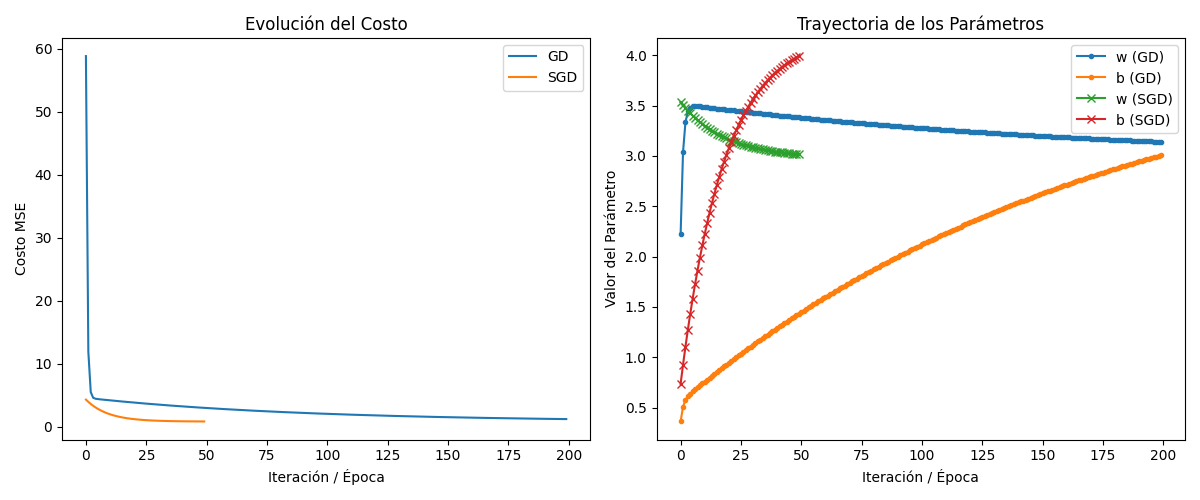

In [27]:
# ✅ Mostrar gráfico guardado
from IPython.display import Image, display
display(Image(filename="../notebook/outputs/comparacion_gd_sgd.png"))


In [36]:
!pytest -s ../tests/test_excepciones.py -v


============================= test session starts ==============================
platform linux -- Python 3.8.20, pytest-8.3.5, pluggy-1.5.0 -- /home/mparraf/.conda/envs/especialidadmachinelearning/bin/python3.8
cachedir: .pytest_cache
rootdir: /home/mparraf/myprojects/ESpecialidadMachineLearning/Modulo3EvalMod_MarcoParra
plugins: Faker-35.2.2
collected 3 items                                                              

../tests/test_excepciones.py::test_matriz_singular_error PASSED
../tests/test_excepciones.py::test_datos_insuficientes_error 
🔍 Test: DatosInsuficientesError - Simulando entrada vacía.
✅ Excepción capturada: No hay suficientes datos para entrenar el modelo.
PASSED
../tests/test_excepciones.py::test_parametros_no_convergentes_error 
🔍 Test: ParametrosNoConvergentesError - Forzando divergencia con lr muy alto.
GD Iteración 0: Costo = 22832848.2963, w = 1866.6667, b = 800.0000
GD Iteración 10: Costo = 178508582620257471853440486401242492396232799389732869201957954256896